In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_hero_names = pd.read_csv("hero_names.csv")
df_players = pd.read_csv("players.csv")
df_match = pd.read_csv("match.csv")
df_purchase_log = pd.read_csv("purchase_log.csv")
df_patch = pd.read_csv("patch_dates.csv")
df_item_ids = pd.read_csv("item_ids.csv")
df_purchase_log = pd.read_csv("purchase_log.csv")

In [3]:
df_hero_names
# pd.set_option('display.max_rows',None)
# print(df_hero_names)

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden
...,...,...,...
107,npc_dota_hero_terrorblade,109,Terrorblade
108,npc_dota_hero_phoenix,110,Phoenix
109,npc_dota_hero_oracle,111,Oracle
110,npc_dota_hero_winter_wyvern,112,Winter Wyvern


24th Hero_id is missing, so we are adjusting it with the indexes. 

In [4]:
df_hero_names = pd.read_csv("hero_names.csv")
df_hero_names = df_hero_names.drop("name",axis=1)

In [5]:
df_hero_names['hero_id']=df_hero_names.index

In [6]:
df_hero_names

,hero_id,localized_name
0,0,Anti-Mage
1,1,Axe
2,2,Bane
3,3,Bloodseeker
4,4,Crystal Maiden
...,...,...
107,107,Terrorblade
108,108,Phoenix
109,109,Oracle
110,110,Winter Wyvern


In [7]:
df_match

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49995,1447829192,3025,1824,0,0,63,117,22,True,0,0,111
49996,49996,1447829181,1451,1982,384,48,63,147,22,True,0,0,204
49997,49997,1447829197,2672,1830,0,0,63,130,22,True,0,0,111
49998,49998,1447829189,2211,1982,4,3,63,645,22,True,0,0,151


The dataset is still using iso format, so changing the date and timing using the function below:

In [8]:
def change_iso_to_int(iso_timestamp):
    dt_object = datetime.strptime(iso_timestamp, '%Y-%m-%dT%H:%M:%SZ')
    int_timestamp = int(time.mktime(dt_object.timetuple()))
    return int_timestamp

In [9]:
df_purchase_log

,item_id,time,player_slot,match_id
0,44,-81,0,0
1,29,-63,0,0
2,43,6,0,0
3,84,182,0,0
4,46,197,0,0
...,...,...,...,...
18193740,141,2256,132,49999
18193741,29,2448,132,49999
18193742,48,2483,132,49999
18193743,40,2494,132,49999


In [10]:
df_players

,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,...,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,...,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49999,0,100,128,2718,17735,468,626,16,9,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
499996,49999,0,9,129,3755,20815,507,607,12,6,...,1.0,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN
499997,49999,0,90,130,1059,16225,371,404,5,3,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
499998,49999,0,73,131,3165,31015,780,703,8,6,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [11]:
df_eda1 = df_match.copy()

In [12]:
df_eda2 = df_match.copy()

In [13]:
df_eda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   match_id                 50000 non-null  int64
 1   start_time               50000 non-null  int64
 2   duration                 50000 non-null  int64
 3   tower_status_radiant     50000 non-null  int64
 4   tower_status_dire        50000 non-null  int64
 5   barracks_status_dire     50000 non-null  int64
 6   barracks_status_radiant  50000 non-null  int64
 7   first_blood_time         50000 non-null  int64
 8   game_mode                50000 non-null  int64
 9   radiant_win              50000 non-null  bool 
 10  negative_votes           50000 non-null  int64
 11  positive_votes           50000 non-null  int64
 12  cluster                  50000 non-null  int64
dtypes: bool(1), int64(12)
memory usage: 4.6 MB


In [14]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 73 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   match_id                           500000 non-null  int64  
 1   account_id                         500000 non-null  int64  
 2   hero_id                            500000 non-null  int64  
 3   player_slot                        500000 non-null  int64  
 4   gold                               500000 non-null  int64  
 5   gold_spent                         500000 non-null  int64  
 6   gold_per_min                       500000 non-null  int64  
 7   xp_per_min                         500000 non-null  int64  
 8   kills                              500000 non-null  int64  
 9   deaths                             500000 non-null  int64  
 10  assists                            500000 non-null  int64  
 11  denies                             5000

In [15]:
df_players2 = df_players.copy()

## Null handling

In [16]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    
    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("No Missing Value is present")
        
    else:
        print(missing_data[missing_data['Total'] > 0])

#### Remove any column that has "unit" in player table

In [17]:
col_to_remove = []
for col in df_players2.columns:
    if 'unit' in col:
        col_to_remove.append(col)
print(col_to_remove)

['unit_order_none', 'unit_order_move_to_position', 'unit_order_move_to_target', 'unit_order_attack_move', 'unit_order_attack_target', 'unit_order_cast_position', 'unit_order_cast_target', 'unit_order_cast_target_tree', 'unit_order_cast_no_target', 'unit_order_cast_toggle', 'unit_order_hold_position', 'unit_order_train_ability', 'unit_order_drop_item', 'unit_order_give_item', 'unit_order_pickup_item', 'unit_order_pickup_rune', 'unit_order_purchase_item', 'unit_order_sell_item', 'unit_order_disassemble_item', 'unit_order_move_item', 'unit_order_cast_toggle_auto', 'unit_order_stop', 'unit_order_taunt', 'unit_order_buyback', 'unit_order_glyph', 'unit_order_eject_item_from_stash', 'unit_order_cast_rune', 'unit_order_ping_ability', 'unit_order_move_to_direction', 'unit_order_patrol', 'unit_order_vector_target_position', 'unit_order_radar', 'unit_order_set_item_combine_lock', 'unit_order_continue']


In [18]:
df_players2 = df_players2.drop(col_to_remove,axis=1)

#### Fill the rest with 0

In [19]:
df_players_fill = df_players2.copy()
df_players_fill.fillna(0,inplace=True)

#### Filling null complete for df_players

In [20]:
cek_null(df_players_fill)

No Missing Value is present


#### We required certain columns from df_players

In [21]:
df_p_eda_hero = df_players_fill[['match_id','account_id','hero_id',"gold","gold_spent","xp_per_min"]]
df_p_eda_hero

,match_id,account_id,hero_id,gold,gold_spent,xp_per_min
0,0,0,86,3261,10960,362
1,0,1,51,2954,17760,659
2,0,0,83,110,12195,385
3,0,2,11,1179,22505,605
4,0,3,67,3307,23825,762
...,...,...,...,...,...,...
499995,49999,0,100,2718,17735,626
499996,49999,0,9,3755,20815,607
499997,49999,0,90,1059,16225,404
499998,49999,0,73,3165,31015,703


#### Create a new feature of is_radiant, True for 5 consecutive rows

In [22]:
def check_player_radiant(row):
    if (row.name%10) < 5:
        return True
    return False

In [23]:
df_p_eda_hero["is_radiant"] = df_p_eda_hero.apply(lambda row: check_player_radiant(row), axis=1)

#### Create a new feature of xp_sum

In [24]:
df_p_eda_hero["xp_sum"] = df_players_fill.apply(lambda row: row['xp_hero']+row['xp_other']+row['xp_creep']+row['xp_roshan'],axis=1)

In [25]:
df_p_eda_hero

,match_id,account_id,hero_id,gold,gold_spent,xp_per_min,is_radiant,xp_sum
0,0,0,86,3261,10960,362,True,14363.0
1,0,1,51,2954,17760,659,True,26125.0
2,0,0,83,110,12195,385,True,15257.0
3,0,2,11,1179,22505,605,True,24000.0
4,0,3,67,3307,23825,762,True,30201.0
...,...,...,...,...,...,...,...,...
499995,49999,0,100,2718,17735,626,False,29124.0
499996,49999,0,9,3755,20815,607,False,28243.0
499997,49999,0,90,1059,16225,404,False,18817.0
499998,49999,0,73,3165,31015,703,False,32701.0


## Merging with hero table

hero_id is wrong on df_p_eda_hero cause there is no number 24 on hero_names table. So, we need to fix that before merging

In [26]:
def fix_hero_id(row):
    if row['hero_id'] >23:
        return row['hero_id']-1
    else:
        return row['hero_id']

In [27]:
df_p_eda_hero['hero_id']=df_p_eda_hero.apply(lambda row:fix_hero_id(row),axis=1)

In [28]:
df_p_eda_hero = df_p_eda_hero.merge(df_hero_names,on="hero_id")

In [29]:
# Sort by match id
df_p_eda_hero = df_p_eda_hero.sort_values(by="match_id", ascending=True).reset_index()

In [30]:
cek_null(df_p_eda_hero)

No Missing Value is present


In [31]:
df_eda2 = df_eda2.merge(df_p_eda_hero, on="match_id")

In [32]:
df_eda2.columns

Index(['match_id', 'start_time', 'duration', 'tower_status_radiant',
       'tower_status_dire', 'barracks_status_dire', 'barracks_status_radiant',
       'first_blood_time', 'game_mode', 'radiant_win', 'negative_votes',
       'positive_votes', 'cluster', 'index', 'account_id', 'hero_id', 'gold',
       'gold_spent', 'xp_per_min', 'is_radiant', 'xp_sum', 'localized_name'],
      dtype='object')

# Match Analysis

# Visualize the daily matches played

In [33]:
df_match['start_time'] = pd.to_datetime(df_match['start_time'], unit='s')

In [34]:
daily_matches = df_match.groupby(df_match['start_time'].dt.date).size()

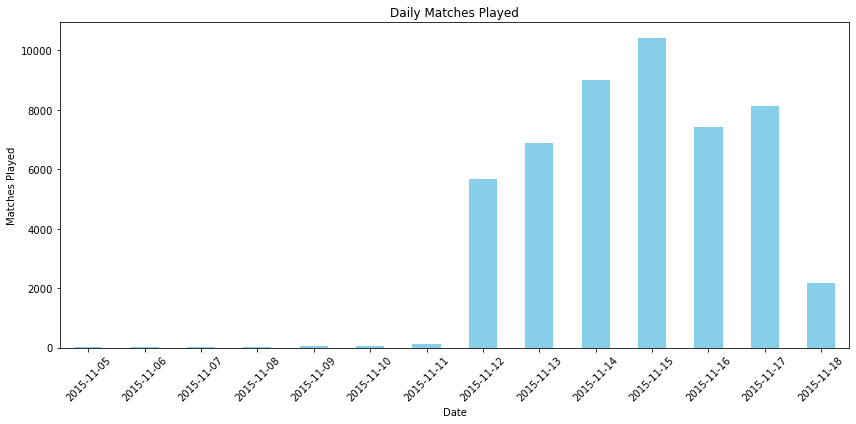

In [35]:
plt.figure(figsize=(12, 6))
daily_matches.plot(kind='bar', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Matches Played')
plt.title('Daily Matches Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the Daily Avg Gold spent

In [36]:
df_match['start_time'] = pd.to_datetime(df_match['start_time'], unit='s')

In [37]:
daily_avg_gold_spent_per_player = df_players.groupby([df_match['start_time'].dt.date, 'account_id'])['gold_spent'].mean().reset_index()

In [38]:
daily_avg_gold_spent = daily_avg_gold_spent_per_player.groupby('start_time')['gold_spent'].mean()

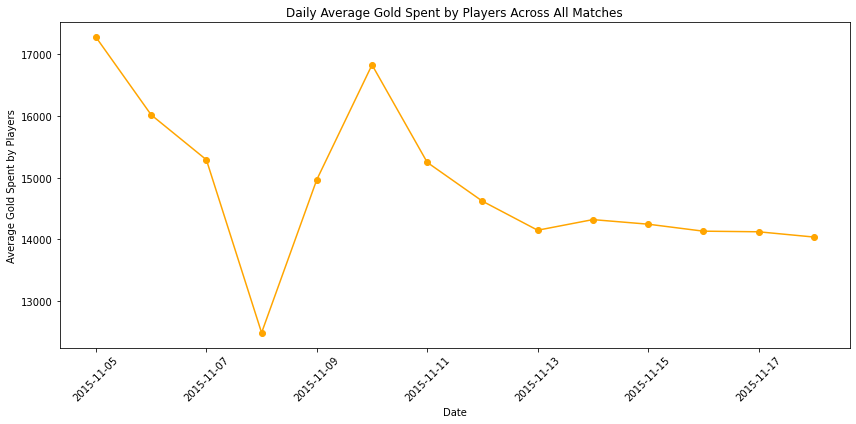

In [39]:
plt.figure(figsize=(12, 6))
daily_avg_gold_spent.plot(kind='line', color='orange', marker='o')
plt.xlabel('Date')
plt.ylabel('Average Gold Spent by Players')
plt.title('Daily Average Gold Spent by Players Across All Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization Of Daily matched played & gold spent

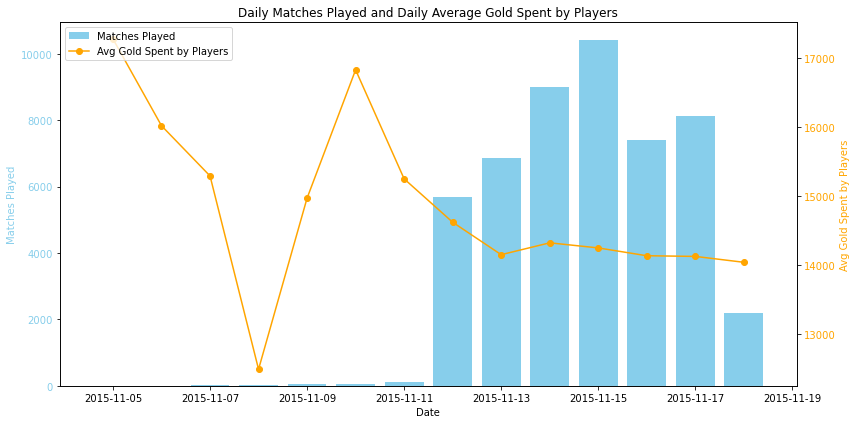

In [40]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot daily matches played on the left axis
ax1.bar(daily_matches.index, daily_matches.values, color='skyblue', label='Matches Played')
ax1.set_xlabel('Date')
ax1.set_ylabel('Matches Played', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis on the right for daily average gold spent
ax2 = ax1.twinx()
ax2.plot(daily_avg_gold_spent.index, daily_avg_gold_spent.values, color='orange', marker='o', label='Avg Gold Spent by Players')
ax2.set_ylabel('Avg Gold Spent by Players', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set the title
plt.title('Daily Matches Played and Daily Average Gold Spent by Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# EDA : Heroes win rate

In [41]:
df_eda_hero_wr = df_eda2[["match_id","account_id","hero_id","localized_name","is_radiant","radiant_win"]]

In [42]:
df_eda_hero_wr["is_win"] = df_eda_hero_wr.apply(lambda row: not (row["is_radiant"] ^ row["radiant_win"])  ,axis=1)

In [43]:
df_eda_hero_wr["is_played"] = 1

In [44]:
df_eda_hero_wr

,match_id,account_id,hero_id,localized_name,is_radiant,radiant_win,is_win,is_played
0,0,0,85,Disruptor,True,True,True,1
1,0,5,45,Viper,False,True,False,1
2,0,4,105,Earth Spirit,False,True,False,1
3,0,2,11,Phantom Lancer,True,True,True,1
4,0,0,101,Elder Titan,False,True,False,1
...,...,...,...,...,...,...,...,...
499995,49999,0,34,Necrophos,True,False,False,1
499996,49999,0,72,Invoker,False,False,True,1
499997,49999,0,99,Skywrath Mage,False,False,True,1
499998,49999,0,67,Doom,True,False,False,1


## calculations for winning & lossing

In [45]:
df_eda_hero_wr1=df_eda_hero_wr.groupby(by=["localized_name"])[["is_win","is_played"]].sum().reset_index()

In [46]:
df_eda_hero_wr1['win_rate'] = df_eda_hero_wr1['is_win']/df_eda_hero_wr1['is_played']*100

In [47]:
df_eda_hero_highest = df_eda_hero_wr1.sort_values(by='win_rate',ascending=False).head(10)
df_eda_hero_highest

,localized_name,is_win,is_played,win_rate
31,Enchantress,3048,5161,59.058322
2,Ancient Apparition,3886,6660,58.348348
22,Death Prophet,4518,7794,57.967667
74,Rubick,3385,5951,56.881196
29,Elder Titan,1882,3310,56.858006
85,Spirit Breaker,2444,4302,56.810786
104,Warlock,3364,5969,56.357849
73,Riki,2625,4687,56.005974
90,Tidehunter,6254,11181,55.934174
41,Kunkka,2547,4589,55.502288


In [48]:
df_eda_hero_lowest = df_eda_hero_wr1.sort_values(by='win_rate',ascending=True).head(10)
df_eda_hero_lowest

,localized_name,is_win,is_played,win_rate
3,Anti-Mage,6,37,16.216216
45,Lifestealer,1357,3344,40.580144
48,Lone Druid,569,1395,40.788530
35,Huskar,415,1016,40.846457
10,Bounty Hunter,613,1486,41.251682
87,Sven,1000,2407,41.545492
69,Pudge,743,1761,42.191936
47,Lion,3537,8255,42.846760
15,Chaos Knight,419,967,43.329886
6,Bane,1999,4601,43.447077


In [49]:
df_eda_hero_least_played = df_eda_hero_wr1.sort_values(by='is_played',ascending=True).head(10)
df_eda_hero_least_played

,localized_name,is_win,is_played,win_rate
3,Anti-Mage,6,37,16.216216
84,Spectre,271,579,46.804836
42,Legion Commander,428,838,51.073986
76,Shadow Demon,464,931,49.838883
15,Chaos Knight,419,967,43.329886
11,Brewmaster,499,985,50.659898
82,Slark,495,997,49.648947
40,Keeper of the Light,452,1001,45.154845
107,Winter Wyvern,480,1009,47.571853
35,Huskar,415,1016,40.846457


In [50]:
df_eda_hero_most_played = df_eda_hero_wr1.sort_values(by='is_played',ascending=False).head(10)
df_eda_hero_most_played

,localized_name,is_win,is_played,win_rate
110,Zeus,10026,20881,48.014942
66,Phantom Lancer,8785,17007,51.655201
79,Silencer,5733,11676,49.100719
39,Juggernaut,5700,11323,50.340016
90,Tidehunter,6254,11181,55.934174
101,Venomancer,4744,10590,44.796978
54,Mirana,5362,10394,51.587454
80,Skywrath Mage,5269,10306,51.125558
36,Invoker,5095,9823,51.868065
72,Razor,4652,9447,49.243146


# Visualizations

## Graph Highest Win Rate

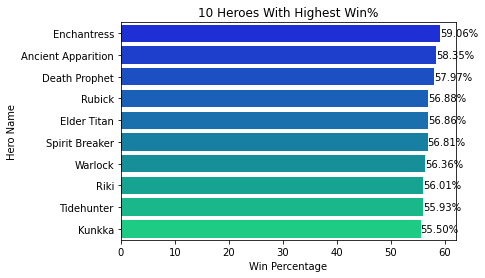

In [51]:
plt.title("10 Heroes With Highest Win%")
# Plot the data
ax = sns.barplot(x='win_rate', y='localized_name', data=df_eda_hero_highest, orient='h', palette='winter')
ax.set_xlabel('Win Percentage')
ax.set_ylabel('Hero Name')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f%%')

# Show the plot
plt.show()

## Graph Lowest Win Rate

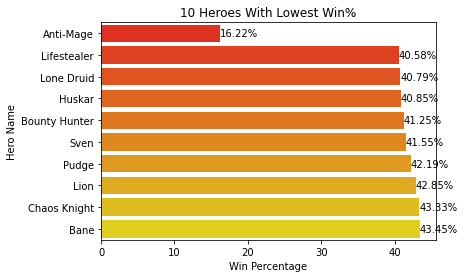

In [52]:
plt.title("10 Heroes With Lowest Win%")
# Plot the data
ax = sns.barplot(x='win_rate', y='localized_name', data=df_eda_hero_lowest, orient='h',palette='autumn')
ax.set_xlabel('Win Percentage')
ax.set_ylabel('Hero Name')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f%%')

# Show the plot
plt.show()


## Graph Least Played

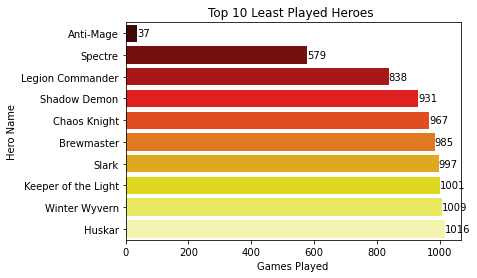

In [53]:
plt.title("Top 10 Least Played Heroes ")
# Plot the data
ax = sns.barplot(x='is_played', y='localized_name', data=df_eda_hero_least_played, orient='h',palette='hot')
ax.set_xlabel('Games Played')
ax.set_ylabel('Hero Name')
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()

## Graph Most Played

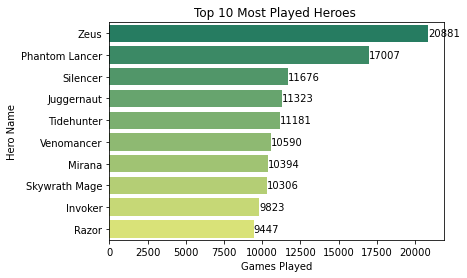

In [54]:
plt.title("Top 10 Most Played Heroes ")
# Plot the data
ax = sns.barplot(x='is_played', y='localized_name', data=df_eda_hero_most_played, orient='h',palette='summer')
ax.set_xlabel('Games Played')
ax.set_ylabel('Hero Name')
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()

# Player Analysis - Player Level Data

In [55]:
df_players.columns

Index(['match_id', 'account_id', 'hero_id', 'player_slot', 'gold',
       'gold_spent', 'gold_per_min', 'xp_per_min', 'kills', 'deaths',
       'assists', 'denies', 'last_hits', 'stuns', 'hero_damage',
       'hero_healing', 'tower_damage', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'level', 'leaver_status', 'xp_hero', 'xp_creep',
       'xp_roshan', 'xp_other', 'gold_other', 'gold_death', 'gold_buyback',
       'gold_abandon', 'gold_sell', 'gold_destroying_structure',
       'gold_killing_heros', 'gold_killing_creeps', 'gold_killing_roshan',
       'gold_killing_couriers', 'unit_order_none',
       'unit_order_move_to_position', 'unit_order_move_to_target',
       'unit_order_attack_move', 'unit_order_attack_target',
       'unit_order_cast_position', 'unit_order_cast_target',
       'unit_order_cast_target_tree', 'unit_order_cast_no_target',
       'unit_order_cast_toggle', 'unit_order_hold_position',
       'unit_order_train_ability', 'unit_order_drop_item',


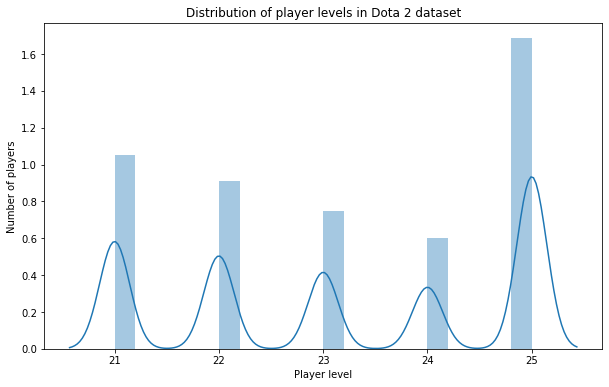

In [56]:
df = pd.read_csv("players.csv")

# Filter for players with level > 20
df_filtered = df[df["level"] > 20]

# Get the distribution of player levels
plt.figure(figsize=(10, 6))
sns.distplot(df_filtered["level"], bins=20)
plt.xlabel("Player level")
plt.ylabel("Number of players")
plt.title("Distribution of player levels in Dota 2 dataset")
plt.show()

In [57]:
# Calculate some descriptive statistics for player level
print("Average player level:", df["level"].mean())
print("Median player level:", df["level"].median())
print("Standard deviation of player level:", df["level"].std())
print("Maximum player level:", df["level"].max())

Average player level: 18.05219
Median player level: 18.0
Standard deviation of player level: 4.359442190621961
Maximum player level: 25


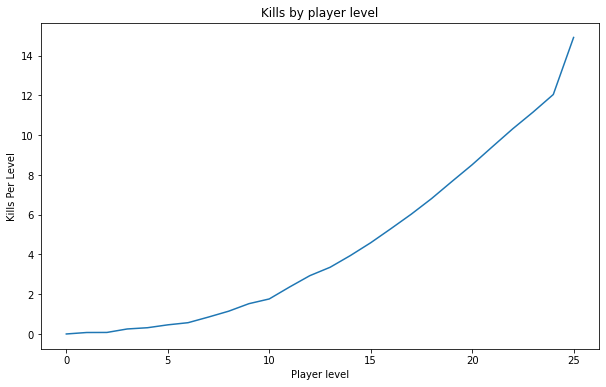

In [58]:
# Explore the relationship between player level and kills by the players
df_ranked_games = df.groupby("level")["kills"].mean()
plt.figure(figsize=(10, 6))
plt.plot(df_ranked_games)
plt.xlabel("Player level")
plt.ylabel("Kills Per Level")
plt.title("Kills by player level")
plt.show()

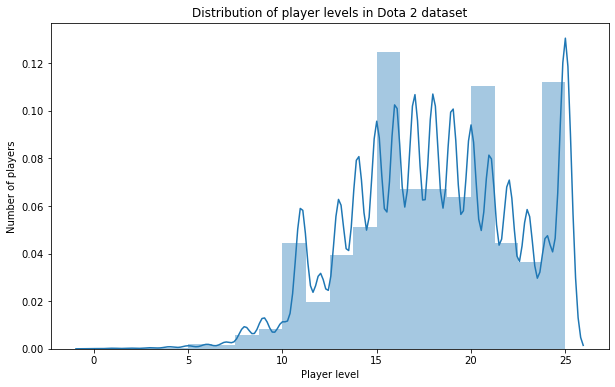

In [59]:
# Distribution of player levels
plt.figure(figsize=(10, 6))
sns.distplot(df["level"], bins=20)
plt.xlabel("Player level")
plt.ylabel("Number of players")
plt.title("Distribution of player levels in Dota 2 dataset")
plt.show()

# Purchases Analysis

In [60]:
df = df_item_ids.merge(df_purchase_log, on="item_id")

In [61]:
purchase_count_df = df.groupby("item_name").size().to_frame(name="purchase_count").reset_index()

In [62]:
# Sort the Data dframe by purchase count
purchase_count_df = purchase_count_df.sort_values(by="purchase_count", ascending=False)

In [63]:
top_10_items = purchase_count_df[0:10]

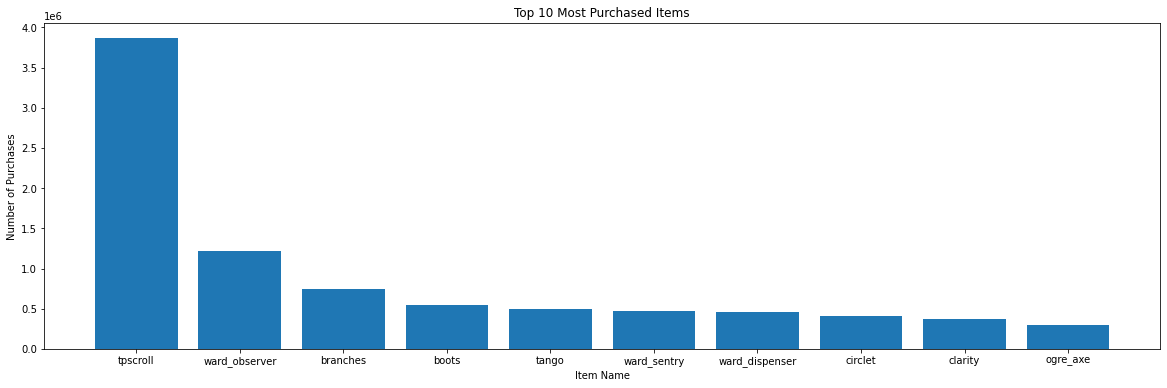

In [64]:
# Plot the number of purchases for each item
plt.figure(figsize=(20, 6))
plt.bar(top_10_items["item_name"], top_10_items["purchase_count"])
plt.xlabel("Item Name")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

In [65]:
top_5_items = purchase_count_df[0:5]

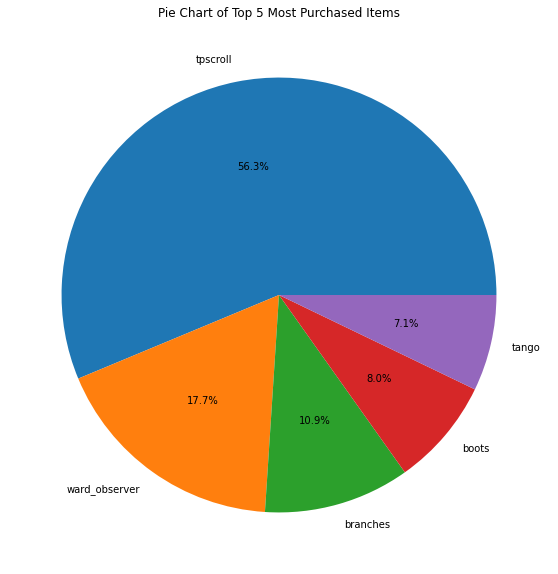

In [66]:
plt.figure(figsize=(30, 10))
plt.pie(top_5_items["purchase_count"], labels=top_5_items["item_name"], autopct="%1.1f%%")
plt.title("Pie Chart of Top 5 Most Purchased Items")
plt.show()

#                                                          Thank You! 